In [1]:
## Import 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
fruad_data = pd.read_csv("D:/Top_mentor/Nov/19th_nov/batch88assignments/Random Forest Project 9 & 10/10. Random Forests/Fraud_check.csv")

In [3]:
df1 = fruad_data.copy()

In [4]:
df1.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


In [5]:
df1.shape

(600, 6)

In [6]:
## Null values checking 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [7]:
df1.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


# Data preprocessing 

In [8]:
## Cretaing column to identify 'Risky' and 'Good' status
df1['Messure'] = df1['Taxable.Income'].apply(lambda x : 'Risky' if x <= 30000 else  'Good')
df1.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Messure
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good


In [9]:
## using of np.select(conditions, choices, default = default_value)
conditions = [(df1['Work.Experience']>= 20), (df1['Work.Experience']>= 10), (df1['Work.Experience']< 10)]
choices= ['highly_exprinced', 'mid_exprinced', 'less_exprinced']
df1['category_exprince'] = np.select(conditions,choices, default= 'non_exprinced' )

In [10]:
df1.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Messure,category_exprince
0,NO,Single,68833,50047,10,YES,Good,mid_exprinced
1,YES,Divorced,33700,134075,18,YES,Good,mid_exprinced


In [11]:
## using of np.select(conditions, choices, default = default_value)
conditions = [(df1['City.Population']>= 150000), (df1['City.Population']>= 80000), (df1['Work.Experience']< 25000)]
choices= ['highly_population', 'mid_population', 'less_population']
df1['Population_level'] =np.select(conditions,choices, default= 'non_population' )

In [12]:
df1.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Messure,category_exprince,Population_level
0,NO,Single,68833,50047,10,YES,Good,mid_exprinced,less_population
1,YES,Divorced,33700,134075,18,YES,Good,mid_exprinced,mid_population


In [41]:
## income category
conditions = [(df1['Taxable.Income']>= 100000), (df1['Taxable.Income']>= 60000), (df1['Taxable.Income']>= 25000)]
choices= ['highly_income', 'mid_income', 'less_mid_income']
df1['income_level'] =np.select(conditions,choices, default= 'low_income' )

In [42]:
df1.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Messure,category_exprince,Population_level,income_level
0,NO,Single,68833,50047,10,YES,Good,mid_exprinced,less_population,mid_income
1,YES,Divorced,33700,134075,18,YES,Good,mid_exprinced,mid_population,less_mid_income


# EDA

In [16]:
## Total number of risk holders 
risk = len(df1[df1['Taxable.Income']<= 30000])
print('Total number of risk status ', risk)

Total number of risk status  124


In [17]:
## Total number of good  
good = len(df1[df1['Taxable.Income']> 30000])
print('Total number of risk status ', good)

Total number of risk status  476


<Axes: >

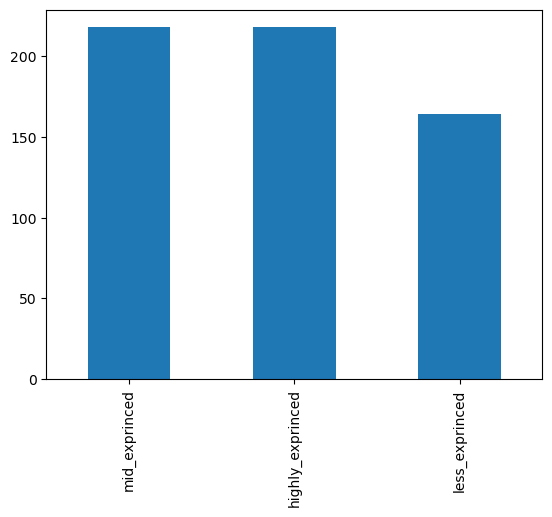

In [76]:
df1['category_exprince'].value_counts().plot(kind='bar')

<Axes: >

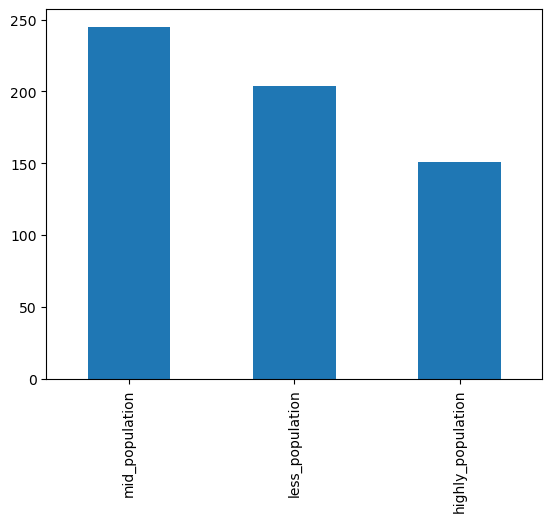

In [77]:
df1['Population_level'].value_counts().plot(kind='bar')

<Axes: >

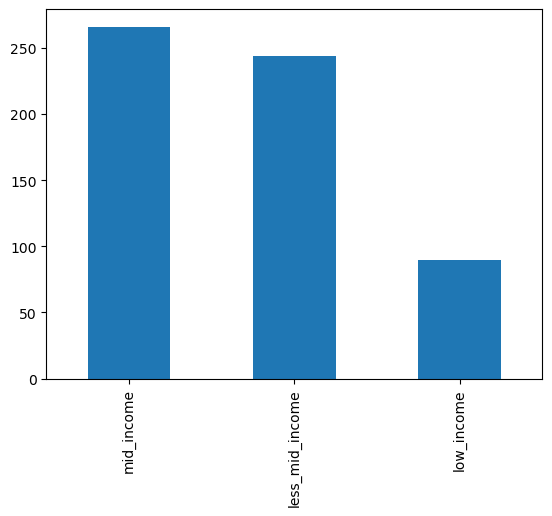

In [78]:
df1['income_level'].value_counts().plot(kind='bar')

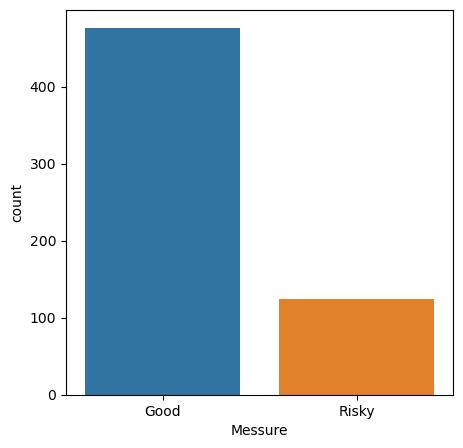

In [18]:
plt.figure(figsize = (5,5))
sns.countplot(x='Messure', data=df1)
plt.show()

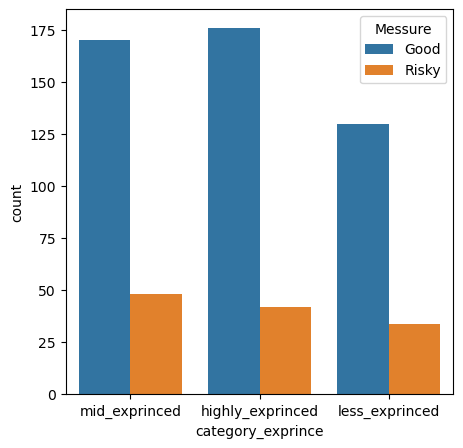

In [19]:
plt.figure(figsize = (5,5))
sns.countplot(x='category_exprince', hue='Messure', data=df1)
plt.show()

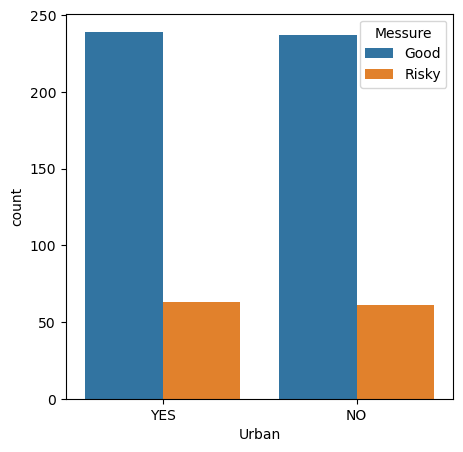

In [20]:
plt.figure(figsize = (5,5))
sns.countplot(x='Urban', hue='Messure',data=df1)
plt.show()

In [21]:
df1.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Messure,category_exprince,Population_level,income_level
0,NO,Single,68833,50047,10,YES,Good,mid_exprinced,less_population,mid_income
1,YES,Divorced,33700,134075,18,YES,Good,mid_exprinced,mid_population,non_income


In [45]:
risky_income_group = df1[(df1['Messure']=='Risky')]['income_level'].value_counts()
print('Risk oriented income group', risky_income_group)

Risk oriented income group low_income         90
less_mid_income    34
Name: income_level, dtype: int64


<Axes: >

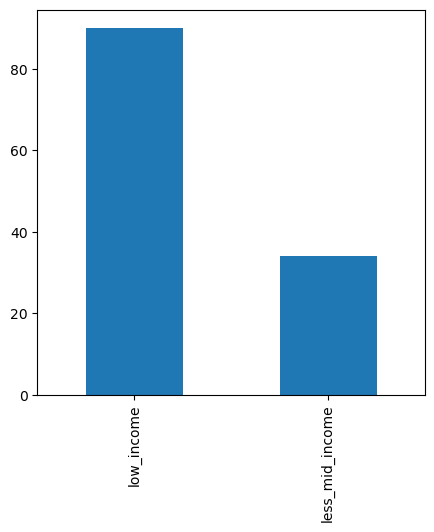

In [64]:
plt.figure(figsize = (5,5))
df1[(df1['Messure']=='Risky')]['income_level'].value_counts().plot(kind='bar')

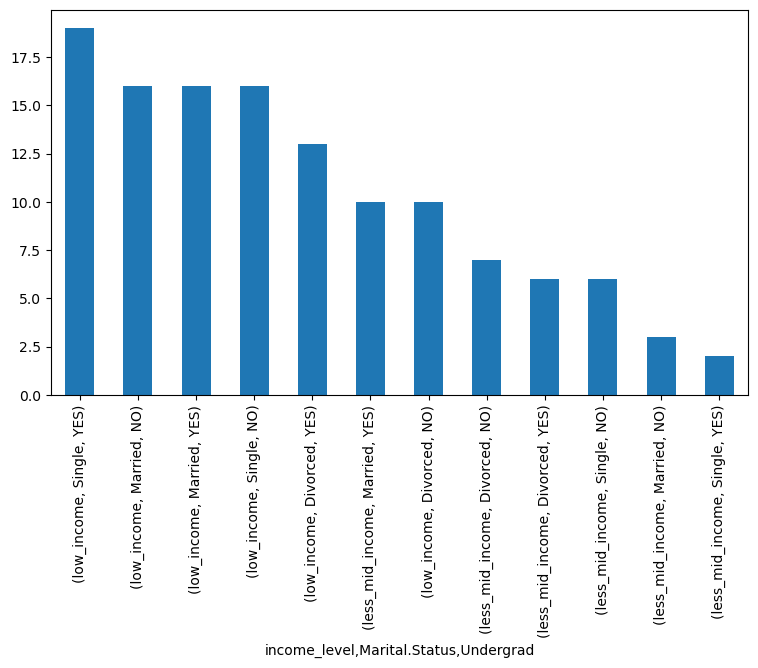

In [72]:
plt.figure(figsize = (9,5))
most_risky = df1[(df1['Messure']=='Risky')][['income_level','Marital.Status', 'Undergrad']].value_counts().plot(kind='bar')

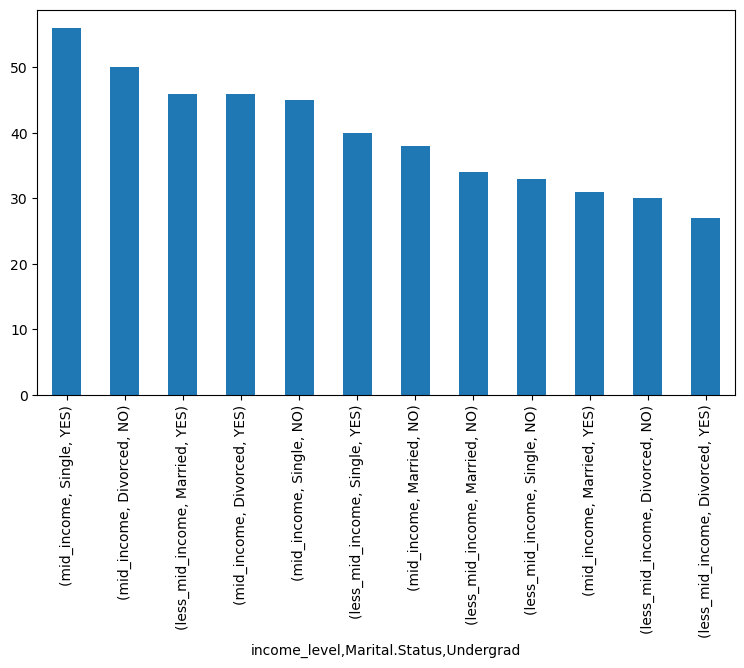

In [67]:
plt.figure(figsize = (9,5))
most_good = df1[(df1['Messure']=='Good')][['income_level','Marital.Status','Undergrad' ]].value_counts().plot(kind='bar')

C:\Users\Acer\AppData\Local\Temp\ipykernel_5256\3076625724.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df1.corr()


<Axes: >

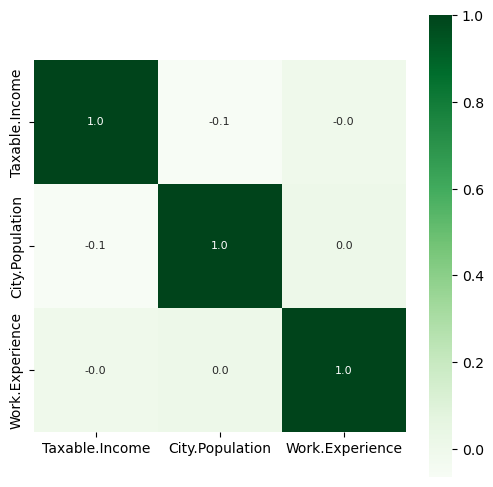

In [73]:
## Correlation 
correlation = df1.corr()
plt.figure(figsize = (6,6))
sns.heatmap(correlation, annot = True, cbar = True,square =True, annot_kws={'size':8}, fmt='.1f', cmap='Greens')

# Spliting and modelling 

In [80]:
df2= df1[['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population','Work.Experience','Urban', 'Messure']]

In [88]:
## Encode Undergrad
df2['Undergrad'] = df2['Undergrad'].apply(lambda x : 1 if x=='YES' else 0)
## Encode Urban
df2['Urban'] = df2['Urban'].apply(lambda x : 1 if x=='YES' else 0)
df2.head(2)

C:\Users\Acer\AppData\Local\Temp\ipykernel_5256\3236780433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Undergrad'] = df2['Undergrad'].apply(lambda x : 1 if x=='YES' else 0)
C:\Users\Acer\AppData\Local\Temp\ipykernel_5256\3236780433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Urban'] = df2['Urban'].apply(lambda x : 1 if x=='YES' else 0)


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Messure
0,0,Single,68833,50047,10,0,Good
1,0,Divorced,33700,134075,18,0,Good


In [106]:
X = df2[['Undergrad','Taxable.Income', 'City.Population','Work.Experience', 'Urban' ]]
X.head(2)

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban
0,0,68833,50047,10,0
1,0,33700,134075,18,0


In [107]:
## Dummy creation of ShelveLoc
get_dummy = pd.get_dummies(df1['Marital.Status'])

In [116]:
## Concat two dataframe
X=pd.concat([X,get_dummy], axis=1)
X

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Divorced,Married,Single,Divorced,Married,Single,Divorced,Married,Single,Divorced,Married,Single
0,0,68833,50047,10,0,0,0,1,0,0,1,0,0,1,0,0,1
1,0,33700,134075,18,0,1,0,0,1,0,0,1,0,0,1,0,0
2,0,36925,160205,30,0,0,1,0,0,1,0,0,1,0,0,1,0
3,0,50190,193264,15,0,0,0,1,0,0,1,0,0,1,0,0,1
4,0,81002,27533,28,0,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,76340,39492,7,0,1,0,0,1,0,0,1,0,0,1,0,0
596,0,69967,55369,2,0,1,0,0,1,0,0,1,0,0,1,0,0
597,0,47334,154058,0,0,1,0,0,1,0,0,1,0,0,1,0,0
598,0,98592,180083,17,0,0,1,0,0,1,0,0,1,0,0,1,0


In [91]:
y=df2['Messure']
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Messure, Length: 600, dtype: object

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=124)

In [113]:
model_rf = RandomForestClassifier(criterion='entropy',max_depth =9)
train_model = model_rf.fit(X_train,y_train)

In [114]:
prediction =train_model.predict(X_test)
prediction

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky'

In [115]:
accu_sc = accuracy_score(prediction,y_test)
print('Accuracy of model =',accu_sc)

Accuracy of model = 1.0
